# Deep Learning CS6073 Assignment 9
    Akhil Devarashetti
    04/07/2020

### Question
    Run DL2.py (Module 1/29/2020) with MNIST and then replace the optimizer SGD with three of the following six
    and run and report the accuracy reached in the same number of epochs.
    (percentage of the 10000 test samples that are correctly classified)
    Also show the replacement code including hyperparameter values to the optimizers.
    
      - SGD with momentum
      - SGD with momemtum and nesterov is true
      - Adagrad
      - Adadelta
      - Adam
      - RMSprop

In [20]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [11]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
batch_size_train = 256
n_epochs = 10

In [3]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        './data/',
        train=True,
        download=True,
        transform=torchvision.transforms.ToTensor()
    ),
    batch_size=batch_size_train,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        './data/', 
        train=False, 
        download=True,
        transform=torchvision.transforms.ToTensor()
    )
)

test_size = len(test_loader.dataset)

In [4]:
model2 = nn.Sequential(
    nn.Linear(num_inputs, num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens, num_outputs))

loss_fn = nn.CrossEntropyLoss()

In [5]:
def train(optimizer):
    for epoch in range(n_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.reshape(-1, num_inputs)
            p = model2(data)
            train_loss = loss_fn(p, target)
            if batch_idx % 100 == 0:
                print('train', epoch, batch_idx, float(train_loss))
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
        m = 0
        for batch_idx, (data, target) in enumerate(test_loader):
            data = data.reshape(-1, num_inputs)
            if int(torch.argmax(model2(data))) == int(target[0]):
                m = m + 1
        print("test", epoch, m, "among", test_size, "correctly classified")

In [6]:
def reset_params():
    for layer in model2.children():
        if hasattr(layer, 'reset_parameters'):
            print(f'Cleared params for layer: {layer}')
            layer.reset_parameters()

### Stochastic Gradient Descent optimizer

In [12]:
reset_params()
sgd = optim.SGD(model2.parameters(), 1e-1)
train(sgd)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.3120274543762207
train 0 100 0.6001712679862976
train 0 200 0.43185892701148987
test 0 8981 among 10000 correctly classified
train 1 0 0.33696043491363525
train 1 100 0.3009839355945587
train 1 200 0.3311253488063812
test 1 9166 among 10000 correctly classified
train 2 0 0.3116787075996399
train 2 100 0.2936050295829773
train 2 200 0.3092414140701294
test 2 9232 among 10000 correctly classified
train 3 0 0.2800420820713043
train 3 100 0.23296579718589783
train 3 200 0.23060350120067596
test 3 9302 among 10000 correctly classified


### Stochastic Gradient Descent with Momentum

In [14]:
reset_params()
sgd = optim.SGD(model2.parameters(), 1e-2, momentum=0.5)
train(sgd)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.292534351348877
train 0 100 1.7922694683074951
train 0 200 1.200226068496704
test 0 8170 among 10000 correctly classified
train 1 0 1.0726455450057983
train 1 100 0.7982168793678284
train 1 200 0.6288928389549255
test 1 8672 among 10000 correctly classified
train 2 0 0.5778769254684448
train 2 100 0.5048604011535645
train 2 200 0.44884318113327026
test 2 8864 among 10000 correctly classified
train 3 0 0.47037777304649353
train 3 100 0.42961016297340393
train 3 200 0.40676015615463257
test 3 8947 among 10000 correctly classified


### Stochastic Gradient Descent with Momentum and Nesterov

In [15]:
reset_params()
sgd = optim.SGD(model2.parameters(), 1e-2, momentum=0.5, nesterov=True)
train(sgd)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.3032214641571045
train 0 100 1.7841253280639648
train 0 200 1.1124649047851562
test 0 8201 among 10000 correctly classified
train 1 0 0.9964576363563538
train 1 100 0.7760831713676453
train 1 200 0.5570434927940369
test 1 8693 among 10000 correctly classified
train 2 0 0.6317296624183655
train 2 100 0.5360236763954163
train 2 200 0.5397245287895203
test 2 8854 among 10000 correctly classified
train 3 0 0.5353261232376099
train 3 100 0.42035019397735596
train 3 200 0.45538684725761414
test 3 8955 among 10000 correctly classified


### Adagrad

In [16]:
reset_params()
adagrad = optim.Adagrad(model2.parameters())
train(adagrad)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.315495252609253
train 0 100 0.24299538135528564
train 0 200 0.2697906792163849
test 0 9394 among 10000 correctly classified
train 1 0 0.21300537884235382
train 1 100 0.17649266123771667
train 1 200 0.21668608486652374
test 1 9496 among 10000 correctly classified
train 2 0 0.17566104233264923
train 2 100 0.14283914864063263
train 2 200 0.1528632789850235
test 2 9582 among 10000 correctly classified
train 3 0 0.1507333517074585
train 3 100 0.15950313210487366
train 3 200 0.14591793715953827
test 3 9614 among 10000 correctly classified


### Adadelta

In [17]:
reset_params()
adadelta = optim.Adadelta(model2.parameters())
train(adadelta)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.3030965328216553
train 0 100 0.26532942056655884
train 0 200 0.2062569260597229
test 0 9212 among 10000 correctly classified
train 1 0 0.2776394784450531
train 1 100 0.13069462776184082
train 1 200 0.20899787545204163
test 1 9454 among 10000 correctly classified
train 2 0 0.1885516345500946
train 2 100 0.12477181106805801
train 2 200 0.08931533992290497
test 2 9649 among 10000 correctly classified
train 3 0 0.11144594103097916
train 3 100 0.0837310329079628
train 3 200 0.1087600588798523
test 3 9726 among 10000 correctly classified


### Adam

In [18]:
reset_params()
adam = optim.Adam(model2.parameters())
train(adam)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.307326078414917
train 0 100 0.3456892669200897
train 0 200 0.3437410593032837
test 0 9331 among 10000 correctly classified
train 1 0 0.20258675515651703
train 1 100 0.17102812230587006
train 1 200 0.13237273693084717
test 1 9567 among 10000 correctly classified
train 2 0 0.14072977006435394
train 2 100 0.12903571128845215
train 2 200 0.14757278561592102
test 2 9651 among 10000 correctly classified
train 3 0 0.09200918674468994
train 3 100 0.10584809631109238
train 3 200 0.0729312002658844
test 3 9684 among 10000 correctly classified


### RMSprop

In [19]:
reset_params()
rms_prop = optim.RMSprop(model2.parameters())
train(rms_prop)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.3254218101501465
train 0 100 0.2090155929327011
train 0 200 0.1822703778743744
test 0 9485 among 10000 correctly classified
train 1 0 0.21620617806911469
train 1 100 0.0857047513127327
train 1 200 0.0915268212556839
test 1 9606 among 10000 correctly classified
train 2 0 0.10506013035774231
train 2 100 0.1033288836479187
train 2 200 0.22231200337409973
test 2 9578 among 10000 correctly classified
train 3 0 0.12277117371559143
train 3 100 0.07260895520448685
train 3 200 0.16300760209560394
test 3 9563 among 10000 correctly classified


In [32]:
import numpy as np

In [33]:
errors = np.array([1, 2, 3, 4])

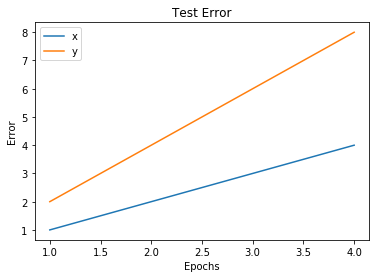

In [42]:
plt.plot(errors, errors, label="x")
plt.plot(errors, errors * 2, label="y")

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Test Error")
plt.legend()

plt.show()

### The accuracy of each optimizer is shown in the plot above